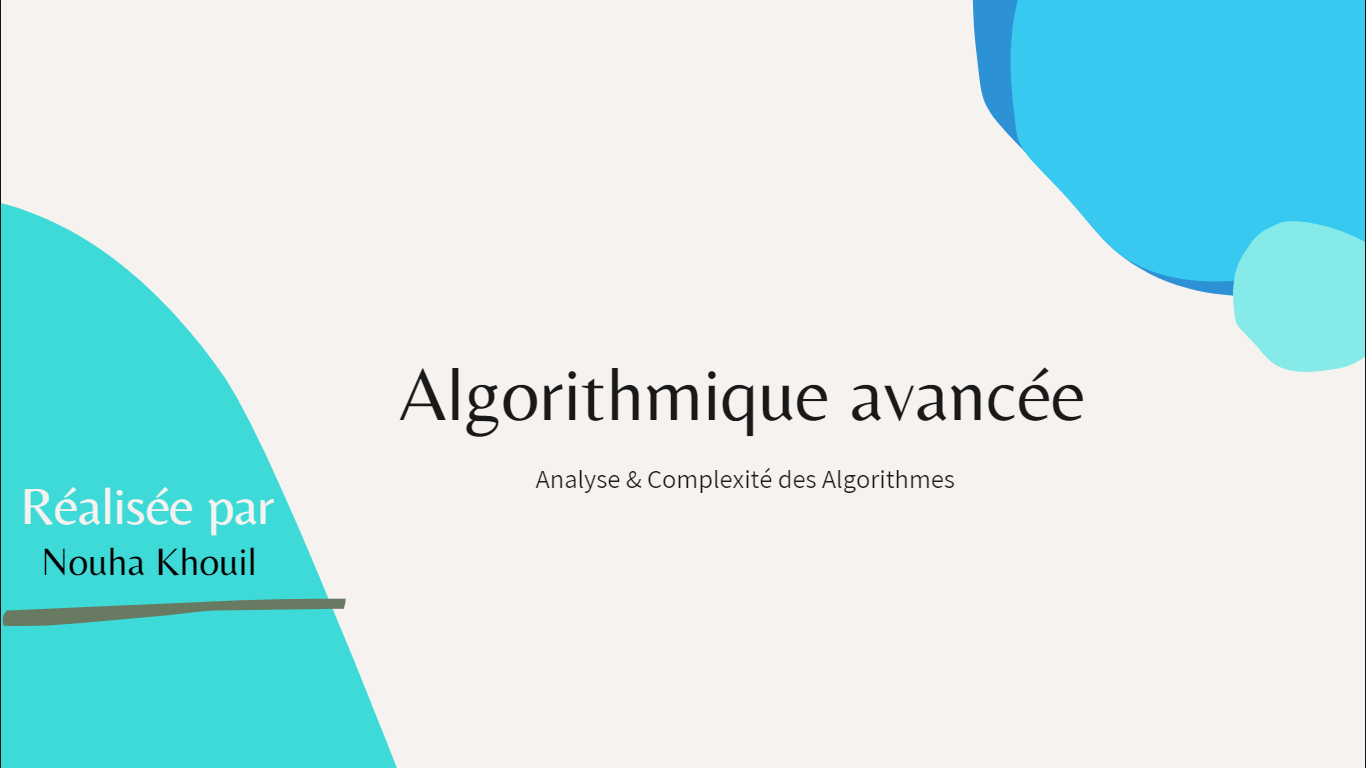

### Importation

In [6]:
#importation
import time
from random import randint
import sys
from scipy import *

### class computeur pour calculer le temps d'excution de chaque algorithme

In [ ]:

class Compteur(object):
    def __init__(self, nom):
        self.nom = nom

    def __enter__(self):
        self.t_debut = time.time()

    def __exit__(self, exc_ty, exc_val, exc_tb):
        t_fin = time.time()
        print('{}: {}'.format(self.nom, t_fin - self.t_debut))


if __name__ == "__main__":
    n = 10000000
    with Compteur('Boucle for'):
        for i in range(n):
            pass
    with Compteur('Boucle while'):
        while n > 0:
            n -= 1

## Comparaison des performances de plusieurs algorithmes de tri écrit en Python :
- tri par sélection
- tri par insertion
- tri fusion
- tri bulle
- tri rapide

In [ ]:
sys.setrecursionlimit(10005)


def tri_selection(t, n):
    """
    Tri par sélection
    On détermine la position du plus petit élément, on le met en première
    position et on itère le procédé sur le tableau restant.
    Complexité en 0(n2) dans tous les cas.
    :param t: tableau à trier
    :param n: taille du tableau
    :return: tableau trié
    """
    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t
    for i in range(n-1):
        # On suppose que le min est en premier
        min = t[i]
        imin = i
        for j in range(i+1, n):
            if t[j] < min:
                # On met à jour le min
                min = t[j]
                imin = j
        if imin != i:
            # On pertmute pour mettre le min en premier
            t[imin] = t[i]
            t[i] = min
    return t





def tri_fusion(t, n):
    """
    Tri fusion
    On découpe le tableau à trier en deux sous-tableaux de taille n/2.
    On trie alors les deux sous-tableaux récursivement, ou on ne fait rien
    s'ils sont de taille 1.
    On reconstitue le tableau trié initial en fusionnant les deux sous-tableaux
    triés.
    La complexité est en O(n*log(n)) dans le pire des cas.
    :param t:
    :param n:
    :return:
    """
    def vidage(ta, pa, na, t, p):
        """
        Copie ta de taille na à partir de la position pa dans t à partir de p
        :param ta: tableau à copier
        :param pa: position à partir de laquelle copier
        :param na: taille de ta
        :param t: tableau de destination
        :param p: position à partir de laquelle coller
        :return:
        """
        for i in range(pa, na):
            t[p] = ta[i]
            p += 1
        return t

    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t

    # Cas général : on découpe le tableau en 2 partie que l'on trie
    p = n // 2
    t1 = t[:p]
    n1 = len(t1)
    t1 = tri_fusion(t1, n1)
    t2 = t[p:]
    n2 = len(t2)
    t2 = tri_fusion(t2, n2)
    # Fusion des deux parties
    p1, p2, p = 0, 0, 0 # position dans t1, t2 et t
    while p1 < n1 and p2 < n2:
        if t1[p1] < t2[p2]:
            # On met t1[p1] dans t
            t[p] = t1[p1]
            p1 += 1
        else:
            # On met t2[p2] dans t
            t[p] = t2[p2]
            p2 += 1
        p += 1
    if p1 == len(t1):
        vidage(t2, p2, len(t2), t, p)
    else:
        vidage(t1, p1, len(t1), t, p)
    return t


def tri_bulle(t, n):
    """
    Tri bulle
    On compare les couples d'éléments successifs pour placer systématiquement
    le plus grand après le plus petit. Un parcours complet du tableau selon
    ce processus nous assure que le plus grand élément est en dernière
    position. On réitère alors le processus sur le sous tableau restant.
    Complexité en O(n**2).
    :param t:
    :param n:
    :return:
    """
    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t
    for i in range(n-1):
        for j in range(n-1-i):
            if t[j] > t[j+1]:
                # On permute
                temp = t[j]
                t[j] = t[j+1]
                t[j+1] = temp
    return t


def tri_rapide(t, n):
    """
    Tri rapide
    On choisit un élément du tableau au hasard qui sera 'pivot' et on permute
    tous les éléments de manière à placer à gauche du pivot les éléments qui
    lui sont inférieurs, et à droite ceux qui lui sont supérieurs.
    On trie alors de la meme manière les deux moitiés de part et d'autre du
    pivot.
    Complexité en O(nlog(n)).
    :param t:
    :param n:
    :return:
    """
    def tri_rapide(t, i, j):
        if i >= j:
            # Pas besoin de trier
            return t
        p = i
        # On place les éléments plus petits que le pivot (t[j-1]) au début
        for k in range(i, j-1):
            if t[k] <= t[j-1]:
                t[k], t[p] = t[p], t[k]
                p += 1
        # On remet le pivot après les éléments plus petits
        t[j-1], t[p] = t[p], t[j-1]
        # On trie les deux parties
        tri_rapide(t, i, p-1)
        tri_rapide(t, p+1, j-1)
        return t

    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t

    t = tri_rapide(t, 0, n)
    return t



### Remplir de mainère aléatoire un tableau de n entiers

In [ ]:
from random import randint
t = [randint(1,1000) for i in range(N)]

#   Mesurer le temps d’exécution selon l’algorithme avec variation de N

# avec N= 20000 :

In [60]:
from random import randint
t = [randint(0,1000) for i in range(20000)]   

In [35]:

 with Compteur("Tri par sélection"):
    t1 = tri_selection(t, len(t))


Tri par sélection: 9.547221660614014 s


In [39]:

 with Compteur("Tri bulle"):
    t2 = tri_bulle(t, len(t))


Tri bulle: 16.62035298347473 s


In [61]:
with Compteur("Tri par insertion"):
    t3 = tri_insertion(t,len(t))


Tri par insertion: 14.400803327560425 s


In [43]:

    with Compteur("Tri fusion"):
        t4 = tri_fusion(t, len(t))
    

Tri fusion: 0.0690150260925293 s


In [6]:
   with Compteur("Tri rapide"):
        t5 = tri_rapide(t, len(t))

Tri rapide: 0.23151636123657227 s


# avec N=25000

In [3]:

from random import randint

t = [randint(0,100) for i in range(25000)]


   

In [19]:

 with Compteur("Tri par sélection"):
    t1 = tri_selection(t, len(t))


Tri par sélection: 14.185972929000854 s


In [21]:

    with Compteur("Tri bulle"):
        t2 = tri_bulle(t, len(t))
    

Tri bulle: 24.706880807876587 s


In [101]:
 with Compteur("Tri par insertion"):
        t3 = tri_insertion(t, len(t))
    

Tri par insertion: 21.89707612991333 s


In [30]:

    with Compteur("Tri fusion"):
        t4 = tri_fusion(t, len(t))
    

Tri fusion: 0.07752847671508789 s


In [9]:
   with Compteur("Tri rapide"):
        t5 = tri_rapide(t, len(t))
        ## 

Tri rapide: 0.3711662292480469 s


# avec N= 30000

In [2]:

from random import randint

t = [randint(0,100) for i in range(30000)]


   

In [33]:

 with Compteur("Tri par sélection"):
    t1 = tri_selection(t, len(t))
   

Tri par sélection: 21.331310033798218 s


In [35]:

    with Compteur("Tri bulle"):
        t2 = tri_bulle(t, len(t))
       

Tri bulle: 38.99021530151367 s


In [67]:
 with Compteur("Tri par insertion"):
        t3 = tri_insertion(t, len(t))
    

Tri par insertion: 34.810436487197876 s


In [39]:

    with Compteur("Tri fusion"):
        t4 = tri_fusion(t, len(t))
       

Tri fusion: 0.10027909278869629 s


In [12]:
   with Compteur("Tri rapide"):
        t5 = tri_rapide(t, len(t))
        ## 

Tri rapide: 0.4937326908111572 s


# avec N= 35000

In [69]:

from random import randint

t = [randint(0,100) for i in range(35000)]


   

In [42]:

 with Compteur("Tri par sélection"):
    t1 = tri_selection(t, len(t))
  

Tri par sélection: 29.16804313659668 s


In [44]:

    with Compteur("Tri bulle"):
        t2 = tri_bulle(t, len(t))
    

Tri bulle: 53.273159980773926 s


In [70]:
 with Compteur("Tri par insertion"):
        t3 = tri_insertion(t, len(t))
        

Tri par insertion: 48.33133125305176 s


In [50]:

    with Compteur("Tri fusion"):
        t4 = tri_fusion(t, len(t))
       

Tri fusion: 0.11578798294067383 s


In [15]:
   with Compteur("Tri rapide"):
        t5 = tri_rapide(t, len(t))
    

Tri rapide: 0.665600061416626 s


 # avec N=40000 

In [72]:

from random import randint

t = [randint(0,100) for i in range(40000)]


   

In [53]:

 with Compteur("Tri par sélection"):
    t1 = tri_selection(t, len(t))
  

Tri par sélection: 39.76587748527527 s


In [55]:

    with Compteur("Tri bulle"):
        t2 = tri_bulle(t, len(t))
    

Tri bulle: 69.02634787559509 s


In [73]:
 with Compteur("Tri par insertion"):
        t3 = tri_insertion(t, len(t))
        

Tri par insertion: 60.95758533477783 s


In [70]:

    with Compteur("Tri fusion"):
        t4 = tri_fusion(t, len(t))
    

Tri fusion: 0.13299989700317383 s


In [18]:
   with Compteur("Tri rapide"):
        t5 = tri_rapide(t, len(t))
        

Tri rapide: 0.8370954990386963 s


# avec  N=45000

In [75]:

from random import randint

t = [randint(0,100) for i in range(45000)]


   

In [87]:

 with Compteur("Tri par sélection"):
    t1 = tri_selection(t, len(t))


Tri par sélection: 50.177722215652466 s


In [89]:

    with Compteur("Tri bulle"):
        t2 = tri_bulle(t, len(t))
    

Tri bulle: 87.49537229537964 s


In [76]:
 with Compteur("Tri par insertion"):
        t3 = tri_insertion(t, len(t))
    

Tri par insertion: 75.46814370155334 s


In [93]:

    with Compteur("Tri fusion"):
        t4 = tri_fusion(t, len(t))
 

Tri fusion: 0.14914560317993164 s


In [21]:
   with Compteur("Tri rapide"):
        t5 = tri_rapide(t, len(t))


Tri rapide: 1.0581440925598145 s


 # avec N=50000

In [78]:

from random import randint

t = [randint(0,100) for i in range(50000)]


   

In [96]:

 with Compteur("Tri par sélection"):
    t1 = tri_selection(t, len(t))


Tri par sélection: 61.94664978981018 s


In [98]:

    with Compteur("Tri bulle"):
        t2 = tri_bulle(t, len(t))
       

Tri bulle: 110.29696321487427 s


In [79]:
 with Compteur("Tri par insertion"):
        t3 = tri_insertion(t, len(t))


Tri par insertion: 93.43600010871887 s


In [103]:

    with Compteur("Tri fusion"):
        t4 = tri_fusion(t, len(t))
       

Tri fusion: 0.17033171653747559 s


In [24]:
   with Compteur("Tri rapide"):
        t5 = tri_rapide(t, len(t))
        

Tri rapide: 1.3522017002105713 s


 # avec N=55000

In [81]:

from random import randint

t = [randint(0,1000) for i in range(55000)]


   

In [106]:

 with Compteur("Tri par sélection"):
    t1 = tri_selection(t, len(t))
  

Tri par sélection: 75.06998705863953 s


In [108]:

    with Compteur("Tri bulle"):
        t2 = tri_bulle(t, len(t))
    

Tri bulle: 130.11645078659058 s


In [82]:
 with Compteur("Tri par insertion"):
        t3 = tri_insertion(t, len(t))
    

Tri par insertion: 116.41174507141113 s


In [112]:

    with Compteur("Tri fusion"):
        t4 = tri_fusion(t, len(t))
    

Tri fusion: 0.19634652137756348 s


In [27]:
   with Compteur("Tri rapide"):
        t5 = tri_rapide(t, len(t))


Tri rapide: 1.673095464706421 s


In [84]:

from random import randint

t = [randint(0,100) for i in range(60000)]


   

In [115]:

 with Compteur("Tri par sélection"):
    t1 = tri_selection(t, len(t))
  

Tri par sélection: 91.89037084579468 s


In [117]:

    with Compteur("Tri bulle"):
        t2 = tri_bulle(t, len(t))
      

Tri bulle: 156.19803977012634 s


In [85]:
 with Compteur("Tri par insertion"):
        t3 = tri_insertion(t, len(t))
        

Tri par insertion: 138.4997682571411 s


In [121]:

    with Compteur("Tri fusion"):
        t4 = tri_fusion(t, len(t))
       

Tri fusion: 0.2071833610534668 s


In [30]:
   with Compteur("Tri rapide"):
        t5 = tri_rapide(t, len(t))
    

Tri rapide: 1.7519826889038086 s


In [87]:

from random import randint

t = [randint(0,100) for i in range(65000)]


   

In [124]:

 with Compteur("Tri par sélection"):
    t1 = tri_selection(t, len(t))


Tri par sélection: 104.04538106918335 s


In [126]:

    with Compteur("Tri bulle"):
        t2 = tri_bulle(t, len(t))
    

Tri bulle: 185.3764717578888 s


In [88]:
 with Compteur("Tri par insertion"):
        t3 = tri_insertion(t, len(t))
        

Tri par insertion: 160.6796100139618 s


In [130]:

    with Compteur("Tri fusion"):
        t4 = tri_fusion(t, len(t))


Tri fusion: 0.22735023498535156 s


In [33]:
   with Compteur("Tri rapide"):
        t5 = tri_rapide(t, len(t))
        

Tri rapide: 2.196239471435547 s


# avec N=70000

In [90]:

from random import randint

t = [randint(0,100) for i in range(70000)]


   

In [133]:

 with Compteur("Tri par sélection"):
    t1 = tri_selection(t, len(t))


Tri par sélection: 122.0393807888031 s


In [135]:

    with Compteur("Tri bulle"):
        t2 = tri_bulle(t, len(t))
    

Tri bulle: 214.0087194442749 s


In [91]:
 with Compteur("Tri par insertion"):
        t3 = tri_insertion(t, len(t))
        #

Tri par insertion: 185.18951749801636 s


In [75]:

    with Compteur("Tri fusion"):
        t4 = tri_fusion(t, len(t))
    

Tri fusion: 0.23462986946105957 s


In [36]:
   with Compteur("Tri rapide"):
        t5 = tri_rapide(t, len(t))
    

Tri rapide: 2.4892189502716064 s


# avec N=75000

In [103]:

from random import randint

t = [randint(0,100) for i in range(75000)]


   

In [142]:

 with Compteur("Tri par sélection"):
    t1 = tri_selection(t, len(t))
   

Tri par sélection: 141.32763981819153 s


In [144]:

    with Compteur("Tri bulle"):
        t2 = tri_bulle(t, len(t))


Tri bulle: 247.10712242126465 s


In [104]:
 with Compteur("Tri par insertion"):
        t3 = tri_insertion(t, len(t))
        

Tri par insertion: 202.90546226501465 s


In [148]:

    with Compteur("Tri fusion"):
        t4 = tri_fusion(t, len(t))
       

Tri fusion: 0.2583894729614258 s


In [39]:
   with Compteur("Tri rapide"):
        t5 = tri_rapide(t, len(t))
        

Tri rapide: 3.1038131713867188 s


# avec N = 80000 

In [106]:

from random import randint

t = [randint(0,100) for i in range(80000)]


   

In [151]:

 with Compteur("Tri par sélection"):
    t1 = tri_selection(t, len(t))


Tri par sélection: 160.04014587402344 s


In [153]:

    with Compteur("Tri bulle"):
        t2 = tri_bulle(t, len(t))
    

Tri bulle: 289.27011036872864 s


In [107]:
 with Compteur("Tri par insertion"):
        t3 = tri_insertion(t, len(t))
        

Tri par insertion: 229.69386982917786 s


In [160]:

    with Compteur("Tri fusion"):
        t4 = tri_fusion(t, len(t))
       ## 

Tri fusion: 0.2686886787414551 s


In [42]:
   with Compteur("Tri rapide"):
        t5 = tri_rapide(t, len(t))
        

Tri rapide: 3.150228977203369 s


# avec N = 85000 <br>

In [109]:

from random import randint

t = [randint(0,100) for i in range(85000)]


   

In [163]:

 with Compteur("Tri par sélection"):
    t1 = tri_selection(t, len(t))


Tri par sélection: 184.89550232887268 s


In [165]:

    with Compteur("Tri bulle"):
        t2 = tri_bulle(t, len(t))
    

Tri bulle: 322.2064919471741 s


In [110]:
 with Compteur("Tri par insertion"):
        t3 = tri_insertion(t, len(t))
        

Tri par insertion: 260.7003848552704 s


In [169]:

    with Compteur("Tri fusion"):
        t4 = tri_fusion(t, len(t))
    

Tri fusion: 0.2938354015350342 s


In [45]:
   with Compteur("Tri rapide"):
        t5 = tri_rapide(t, len(t))
        

Tri rapide: 3.7129898071289062 s


# avec N = 90000 <br>

In [112]:

from random import randint

t = [randint(0,100) for i in range(90000)]


   

In [172]:

 with Compteur("Tri par sélection"):
    t1 = tri_selection(t, len(t))


Tri par sélection: 211.2524333000183 s


In [174]:

    with Compte 53.273159980773926ur("Tri bulle"):
        t2 = tri_bulle(t, len(t))
    

Tri bulle: 353.400310754776 s


In [113]:
 with Compteur("Tri par insertion"):
        t3 = tri_insertion(t, len(t))
      

Tri par insertion: 305.0498306751251 s


In [93]:

    with Compteur("Tri fusion"):
        t4 = tri_fusion(t, len(t))


Tri fusion: 0.31865429878234863 s


In [48]:
   with Compteur("Tri rapide"):
        t5 = tri_rapide(t, len(t))
    

Tri rapide: 4.27129054069519 s


# avec N = 95000 <br>

In [115]:

from random import randint

t = [randint(0,100) for i in range(95000)]


   

In [183]:

 with Compteur("Tri par sélection"):
    t1 = tri_selection(t, len(t))

Tri par sélection: 223.12534523010254 s


In [184]:

    with Compteur("Tri bulle"):
        t2 = tri_bulle(t, len(t))
    

Tri bulle: 387.68277978897095 s


In [116]:
 with Compteur("Tri par insertion"):
        t3 = tri_insertion(t, len(t))
    

Tri par insertion: 335.07912039756775 s


In [97]:

    with Compteur("Tri fusion"):
        t4 = tri_fusion(t, len(t))
    

Tri fusion: 0.35184764862060547 s


In [51]:
   with Compteur("Tri rapide"):
        t5 = tri_rapide(t, len(t))
        

Tri rapide: 4.44722843170166 s


# avec N = 100000 <br>

In [118]:

from random import randint

t = [randint(0,100) for i in range(100000)]


   

In [189]:

 with Compteur("Tri par sélection"):
    t1 = tri_selection(t, len(t))

Tri par sélection: 235.58470368385315 s


In [194]:

    with Compteur("Tri bulle"):
        t2 = tri_bulle(t, len(t))
    

Tri bulle: 395.67069816589355 s


In [119]:
 with Compteur("Tri par insertion"):
        t3 = tri_insertion(t, len(t))
        

Tri par insertion: 368.0570664405823 s


In [90]:

    with Compteur("Tri fusion"):
        t4 = tri_fusion(t, len(t))
       

Tri fusion: 0.3797025680541992 s


In [54]:
   with Compteur("Tri rapide"):
        t5 = tri_rapide(t, len(t))
    

Tri rapide: 5.1948935985565186 s


#   Les tableaux des mesures du temps et  que la courbe correspondant à l'algorithme

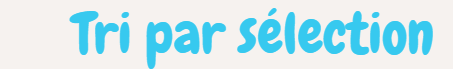

Le nombre de  N  entiers.   |                  Temps d’exécution 
:----- | :----: 
20000   |   9.547221660614014 
25000  |  14.185972929000854 
30000|21.331310033798218
35000| 29.16804313659668 
40000|39.76587748527527
45000|50.177722215652466
50000|61.94664978981018
55000|75.06998705863953
60000|91.89037084579468
65000|104.04538106918335
70000|122.0393807888031
75000|141.32763981819153
80000|160.04014587402344
85000|184.89550232887268
90000|211.2524333000183 
95000| 223.12534523010254
100000| 235.58470368385315

courbe : 

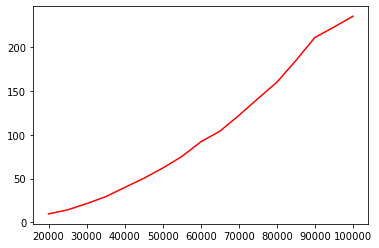

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([20000, 25000, 30000, 35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000])
y = np.array([9.547221660614014 , 14.185972929000854 ,21.331310033798218,29.16804313659668 ,39.76587748527527,50.177722215652466,61.94664978981018,75.06998705863953,91.89037084579468,104.04538106918335,122.0393807888031,141.32763981819153,160.04014587402344,184.89550232887268,211.2524333000183,223.12534523010254,235.58470368385315])
plt.plot(x, y,'r')
plt.show() # affiche la figure a l'ecran

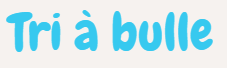

Le nombre de  N  entiers.   |                  Temps d’exécution 
:----- | :----: 
20000   | 16.62035298347473 
25000  | 24.706880807876587
30000|38.99021530151367
35000| 53.273159980773926
40000|69.02634787559509
45000|87.49537229537964
50000|110.29696321487427
55000|130.11645078659058 
60000|156.19803977012634
65000|185.3764717578888
70000|214.0087194442749
75000|247.10712242126465 
80000|289.27011036872864
85000| 322.2064919471741
90000|353.400310754776
95000|387.68277978897095
100000|395.67069816589355 

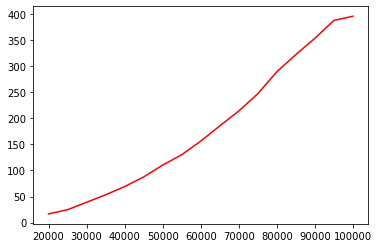

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([20000, 25000, 30000, 35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000])
y = np.array([16.62035298347473 ,24.706880807876587,38.99021530151367, 53.273159980773926,69.02634787559509,87.49537229537964,110.29696321487427,130.11645078659058 ,156.19803977012634,185.3764717578888,214.0087194442749,247.10712242126465 ,289.27011036872864,322.2064919471741,353.400310754776,387.68277978897095, 395.67069816589355 ])
plt.plot(x, y,'r')
plt.show() # affiche la figure a l'ecran


## Tri par insertion


#  <div style="color:#9E1A1A"> 

Le nombre de  N  entiers.   |                  Temps d’exécution 
:----- | :----: 
20000   |  14.400803327560425
25000  |  21.89707612991333 
30000|34.810436487197876 
35000|48.33133125305176
40000|60.95758533477783
45000|75.46814370155334
50000| 93.43600010871887
55000|116.41174507141113
60000|138.4997682571411
65000|160.6796100139618
70000|185.18951749801636 
75000| 202.90546226501465
80000|229.69386982917786 
85000|260.7003848552704
90000| 305.0498306751251 
95000|335.07912039756775
100000| 368.0570664405823 

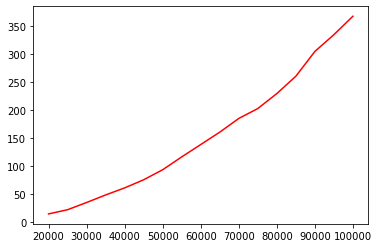

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([20000, 25000, 30000, 35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000])
y = np.array([14.400803327560425,21.89707612991333 ,34.810436487197876 ,48.33133125305176,60.95758533477783,75.46814370155334, 93.43600010871887,116.41174507141113,138.4997682571411,160.6796100139618,185.18951749801636 ,202.90546226501465,229.69386982917786 ,260.7003848552704 , 305.0498306751251,335.07912039756775, 368.0570664405823  ])
plt.plot(x, y,'r')
plt.show() # affiche la figure a l'ecran

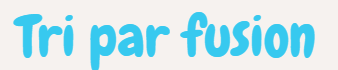

Le nombre de  N  entiers.   |                  Temps d’exécution 
:----- | :----: 
20000   |  0.0690150260925293 
25000  |  0.07752847671508789 
30000|0.10027909278869629 
35000|0.11578798294067383
40000|0.13299989700317383 
45000|0.14914560317993164 
50000|0.17033171653747559 
55000|0.19634652137756348 
60000|0.2071833610534668
65000|0.22735023498535156
70000| 0.23462986946105957
75000|0.2583894729614258 
80000| 0.2686886787414551
85000|0.2938354015350342
90000|0.31865429878234863
95000| 0.35184764862060547
100000| 0.3797025680541992

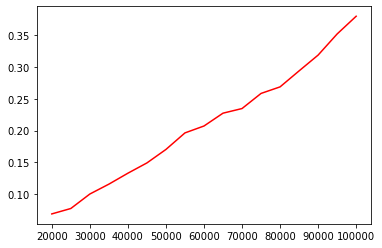

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([20000, 25000, 30000, 35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000])
y = np.array([0.0690150260925293 , 0.07752847671508789 ,0.10027909278869629 ,0.11578798294067383,0.13299989700317383 ,0.14914560317993164 ,0.17033171653747559 ,0.19634652137756348 ,0.2071833610534668,0.22735023498535156, 0.23462986946105957,0.2583894729614258 , 0.2686886787414551,0.2938354015350342,0.31865429878234863, 0.35184764862060547, 0.3797025680541992])             

plt.plot(x, y,'r')
plt.show() # affiche la figure a l'ecran

## Tri rapide

Le nombre de  N  entiers.   |                  Temps d’exécution 
:----- | :----: 
20000   |  0.23151636123657227
25000  |0.3711662292480469
30000|  0.4937326908111572
35000|  0.665600061416626
40000|0.8370954990386963
45000|1.0581440925598145
50000| 1.3522017002105713
55000| 1.673095464706421
60000| 1.7519826889038086
65000|2.196239471435547
70000|2.4892189502716064 
75000|3.1038131713867188
80000| 3.150228977203369
85000| 3.7129898071289062
90000| 4.27129054069519
95000|4.4472284317016
100000| 5.1948935985565186

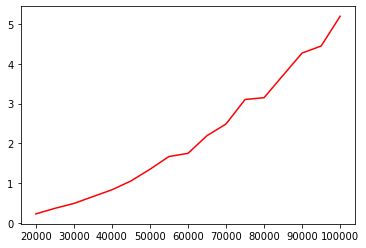

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([20000, 25000, 30000, 35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000])
y = np.array([0.23151636123657227,0.3711662292480469,0.4937326908111572, 0.665600061416626,0.8370954990386963,1.0581440925598145,1.3522017002105713, 1.673095464706421, 1.7519826889038086,2.196239471435547,2.4892189502716064 ,3.1038131713867188,3.150228977203369,3.7129898071289062,4.27129054069519,4.4472284317016,5.1948935985565186])
plt.plot(x, y,'r')

plt.show() # affiche la figure a l'ecran